TRANSFORMERS

* **Tensorflow_hub** : Place where all TensorFlow pre-trained models are stored.
* **Tensorflow** : For model creation
* **Tensorflow_text**: Allows additional NLP text processing capabilities outside the scope of tensorflow

In [1]:
import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
import io
import re
import os
import tqdm
import shutil
import string
import random
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy
import fr_core_news_sm

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.initializers import Constant
from keras.layers import (Input,
                          LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)

from tensorflow.keras import Model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Flatten, Dot
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
import os
import torch
import tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import warnings
warnings.filterwarnings("ignore")

torch.__version__, tensorflow.__version__

('1.9.0+cu111', '2.9.1')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
sentiment_vector = ['joie','colere','surprise','tristesse','peur','confiance','degout','reflexion']

In [5]:
from collections import Counter

In [5]:
test = ['joie', 'joie', 'joie', 'joie', 'peur', 'joie']
obj_count = Counter(test)
obj_count

Counter({'joie': 5, 'peur': 1})

In [6]:
obj_count.keys(), obj_count.values()

(dict_keys(['joie', 'peur']), dict_values([5, 1]))

In [7]:
for k,v in obj_count.items():
    print(obj_count[v], ':', obj_count[k] )

0 : 5
0 : 1


In [8]:
for k,v in zip(obj_count.keys(), obj_count.values()):
    print(k,v)

joie 5
peur 1


### Creer les fonctions pour la vectozization 

In [13]:
def mapping():
    return {'joie' : 1,
            'colere' : 2,
            'surprise' : 3,
            'tristesse' : 4,
            'peur' : 5,
            'confiance' : 6,
            'degout' : 7,
            'reflexion' : 8}

In [14]:
d= mapping()
d

{'joie': 1,
 'colere': 2,
 'surprise': 3,
 'tristesse': 4,
 'peur': 5,
 'confiance': 6,
 'degout': 7,
 'reflexion': 8}

### Checkin Antoine

In [6]:
import os

p = r'C:\Users\david\JEDHA BOOTCAMP\FULLSTACK\10_PROJECT\FINAL_PROJECT\Dictionnaire_emotions'
f = os.path.join(p, '', 'df_nlp_2_bis.csv')

antoine_df = pd.read_csv(f)

In [7]:
antoine_df.columns

Index(['Unnamed: 0', 'book_id', 'book_nb_comm', 'title', 'name', 'surname',
       'tags', 'img_url', 'comm_id', 'user_id', 'note', 'date',
       'appreciations', 'commentaire', 'note_p', 'com_process', 'tokenized',
       'filtre_sentiments', 'sentimentest', 'sentiments_final', 'com_final',
       'tokenized_doc'],
      dtype='object')

# data-comms.json

### Checkin Julien

In [5]:
p2 = r'C:\Users\david\JEDHA BOOTCAMP\FULLSTACK\10_PROJECT\FINAL_PROJECT\csv_files'
f2 = os.path.join(p2, '', 'data-comm.json')

julien1_df = pd.read_json(f2, lines=True)

In [6]:
print(julien1_df.shape)
julien1_df.columns

(314009, 28)


Index(['book_id', 'book_nb_comm', 'title', 'name', 'surname', 'img_url',
       'comm_id', 'user_id', 'note', 'date', 'appreciations', 'commentaire',
       'gender', 'book_url', 'tags', 'book_rating_count', 'book_rating_value',
       'book_author_url', 'book_editor', 'book_pages', 'sen_colère',
       'sen_confiance', 'sen_honte', 'sen_joie', 'sen_peur', 'sen_réflexion',
       'sen_surprise', 'sen_tristesse'],
      dtype='object')

In [65]:
julien1_df

,book_id,book_nb_comm,title,name,surname,img_url,comm_id,user_id,note,date,...,book_editor,book_pages,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2080694,706958,4.0,30 novembre 2019,...,Gallmeister,491,0.292288,0.18784,0.0,0.334643,0.098929,0.137829,0.092294,0.14299
1,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,1271915,319761,5.0,03 mars 2017,...,Gallmeister,491,0.292288,0.18784,0.0,0.334643,0.098929,0.137829,0.092294,0.14299
2,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,1093854,128814,5.0,27 juin 2016,...,Gallmeister,491,0.292288,0.18784,0.0,0.334643,0.098929,0.137829,0.092294,0.14299
3,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2711430,227017,4.5,22 juillet 2021,...,Gallmeister,491,0.292288,0.18784,0.0,0.334643,0.098929,0.137829,0.092294,0.14299
4,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2685514,138438,4.5,26 juin 2021,...,Gallmeister,491,0.292288,0.18784,0.0,0.334643,0.098929,0.137829,0.092294,0.14299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314004,609937,59,Seuls les vautours,Nicolas,Zeimet,/couv/CVT_CVT_Seuls-les-vautours_5777.jpg,1057334,166603,5.0,09 mai 2016,...,10-18,552,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
314005,609937,59,Seuls les vautours,Nicolas,Zeimet,/couv/CVT_CVT_Seuls-les-vautours_5777.jpg,939776,262506,5.0,07 décembre 2015,...,10-18,552,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
314006,609937,59,Seuls les vautours,Nicolas,Zeimet,/couv/CVT_CVT_Seuls-les-vautours_5777.jpg,3027068,306182,2.5,05 mai 2022,...,10-18,552,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
314007,609937,59,Seuls les vautours,Nicolas,Zeimet,/couv/CVT_CVT_Seuls-les-vautours_5777.jpg,2027517,14577,,02 octobre 2019,...,10-18,552,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000


In [66]:
df_sent = julien1_df.iloc[:61610, -8:]

In [67]:
df_sent

,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
1,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
2,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
3,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
4,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
...,...,...,...,...,...,...,...,...
61605,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61606,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61607,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61608,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916


In [68]:
import polars as pl

df = pl.DataFrame({
    "a": [1, 2, 3],
    "b": [4, 5, 6]
})

liste = df.select([
    pl.concat_list([
        pl.col("a").reshape((-1, 1)), 
        pl.col("b").reshape((-1, 1))
    ])
])

In [69]:
print(type(liste))
liste

<class 'polars.internals.dataframe.frame.DataFrame'>


a
list[i64]
"[1, 4]"
"[2, 5]"
"[3, 6]"


In [70]:
df_sent_sample = df_sent.iloc[:10000,-8:]
df_sent_sample = df_sent_sample.sample(10).reset_index(drop=True)

In [71]:
df_sent_sample

,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,0.037392,0.108213,0.028506,0.164438,0.000000,0.112622,0.136444,0.193053
1,0.185743,0.153563,0.033504,0.282413,0.020836,0.167631,0.179570,0.153805
2,0.054358,0.356334,0.000000,0.139989,0.025937,0.212976,0.068542,0.222353
3,0.113962,0.115022,0.028331,0.205788,0.112182,0.174169,0.272420,0.214076
4,0.028710,0.142630,0.000000,0.291135,0.045954,0.085019,0.252787,0.255985
5,0.138177,0.153345,0.033038,0.233701,0.069467,0.195713,0.151178,0.129434
6,0.093624,0.147728,0.000000,0.314495,0.025396,0.175255,0.260523,0.172373
7,0.043336,0.185769,0.000000,0.130431,0.098586,0.223468,0.188123,0.191822
8,0.112849,0.299754,0.044137,0.212701,0.083650,0.168463,0.172430,0.236006
9,0.166261,0.205637,0.000000,0.172845,0.153985,0.094324,0.371064,0.168033


In [72]:
def create_target(df, columns, print_=False):
    i,j = 0, len(df)
    df['target'] =  [[] for i in range(df.shape[0])]
    while i<j:
        s = []
        for ind,col in enumerate(columns):
            el = df.iloc[i][col]
            s.append(el)
        if print_:
            print(s)
        df.loc[i, 'target'].append(s)
        i+=1
    df['target'] = df['target'].apply(lambda row: [elem for el in row for elem in el])
    return df

In [75]:
df_sent = create_target(df_sent, columns=df_sent.columns)
df_sent

,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse,target
0,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
1,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
2,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
3,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
4,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
...,...,...,...,...,...,...,...,...,...
61605,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61606,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61607,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61608,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."


### Creation de la target pour le grand dataset

In [9]:
df_sent_test = julien1_df.iloc[:61610, :]

In [10]:
columns_ = df_sent_test.columns[-8:]

In [11]:
df_sent_test = create_target(df_sent_test, columns=columns_)
df_sent_test

,book_id,book_nb_comm,title,name,surname,img_url,comm_id,user_id,note,date,...,book_pages,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse,target
0,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2080694,706958,4.0,30 novembre 2019,...,491,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
1,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,1271915,319761,5.0,03 mars 2017,...,491,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
2,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,1093854,128814,5.0,27 juin 2016,...,491,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
3,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2711430,227017,4.5,22 juillet 2021,...,491,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
4,905033,137,"Le gang de la clef à molette (Ne meurs pas, ô ...",Edward,Abbey,/couv/CVT_cvt_Le-gang-de-la-clef-a-molette_345...,2685514,138438,4.5,26 juin 2021,...,491,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990,"[0.2922881035, 0.1878402959, 0.0, 0.3346425303..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61605,1303453,44,"Une enquête de William Wisting, tome 5 : Le co...",Jørn Lier,Horst,/couv/CVT_Le-code-de-Katharina_640.jpg,2672567,786180,3.5,13 juin 2021,...,0,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61606,1303453,44,"Une enquête de William Wisting, tome 5 : Le co...",Jørn Lier,Horst,/couv/CVT_Le-code-de-Katharina_640.jpg,2672567,786180,3.5,13 juin 2021,...,0,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61607,1303453,44,"Une enquête de William Wisting, tome 5 : Le co...",Jørn Lier,Horst,/couv/CVT_Le-code-de-Katharina_640.jpg,2672567,786180,3.5,13 juin 2021,...,0,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."
61608,1303453,44,"Une enquête de William Wisting, tome 5 : Le co...",Jørn Lier,Horst,/couv/CVT_Le-code-de-Katharina_640.jpg,2672567,786180,3.5,13 juin 2021,...,0,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916,"[0.07817766200000001, 0.1822976926, 0.0, 0.290..."


In [12]:
df_sent_test.columns

Index(['book_id', 'book_nb_comm', 'title', 'name', 'surname', 'img_url',
       'comm_id', 'user_id', 'note', 'date', 'appreciations', 'commentaire',
       'gender', 'book_url', 'tags', 'book_rating_count', 'book_rating_value',
       'book_author_url', 'book_editor', 'book_pages', 'sen_colère',
       'sen_confiance', 'sen_honte', 'sen_joie', 'sen_peur', 'sen_réflexion',
       'sen_surprise', 'sen_tristesse', 'target'],
      dtype='object')

## Preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"qu'il", "qu il", text)
    text = re.sub(r"d", "", text)
    text = re.sub(r"l", "", text)
    text = re.sub(r"n", "", text)
    text = re.sub(r"livre", "", text)
    text = re.sub(r"roman", "", text)
    text = re.sub(r"auteur", "", text)
    text = re.sub(r"personnage", "", text)
    text = re.sub(r"personnages", "", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

### Remove punctuation

In [19]:
def remove_punctuations(df, col, lemma=None):
    import string
    corpus = df[col].tolist()
    nlp = fr_core_news_sm.load()
    comms = []
    for el in corpus:
        el = el.replace("'", ' ')
        el = el.replace(".", ' ')
        el = el.replace('é','e').replace('è','e').replace('û','u').replace('î','i').replace('ô','o').replace('ï','i').replace('ö','o').replace('ù','u').replace('á','a'). replace('â','a').replace('à','a')
        el = el.translate(str.maketrans(' ',' ',string.punctuation))
        el = el.replace(':', '').replace('\n', ' ').strip()
        el = ' '.join([elem for elem in el.split() if len(elem)>1]) # pour la lettre J ou j : and (elem =! 'J' or elem != 'j')
        if lemma:
#            out = [token.lemma_ for token in nlp(el) if (token.lemma_ not in stopwords) and (len(token) > 1) and (token.text not in stopwords) or (token.text=='x' or token.text=='y' or token.text=='i')]
            el = [token.lemma_ for token in nlp(el) if  (len(token) > 1)]
            el = ' '.join(el)
        comms.append(el)
    df["commentaire_clean"] = comms
    return df

In [20]:
df_sent_test = remove_punctuations(df_sent_test, 'commentaire', lemma=None)

In [21]:
df_sent_test.columns

Index(['book_id', 'book_nb_comm', 'title', 'name', 'surname', 'img_url',
       'comm_id', 'user_id', 'note', 'date', 'appreciations', 'commentaire',
       'gender', 'book_url', 'tags', 'book_rating_count', 'book_rating_value',
       'book_author_url', 'book_editor', 'book_pages', 'sen_colère',
       'sen_confiance', 'sen_honte', 'sen_joie', 'sen_peur', 'sen_réflexion',
       'sen_surprise', 'sen_tristesse', 'commentaire_clean'],
      dtype='object')

In [ ]:
y = df_sent_test[df_sent_test.columns[-10:-2]]

## Deep Learning

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer() # se renseigner sur cette classe

# One-hot encode data
mlb.fit_transform(y)

### Test avec BERT classic

In [204]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')  # bert_en_uncased_preprocess
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')  # bert_en_uncased_L-12_H-768_A-12

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(df_sent_test['commentaire_clean'], y,
                                                    stratify = y)

In [227]:
X_train.shape, X_test.shape

((46207,), (15403,))

### Creating the model

In [234]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(8, activation = 'sigmoid', name = 'Dense')(dropout)

In [235]:
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [236]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['Inputs[0][0]']                 
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

* **text_input**: comme la data shape de notre modèle peut être n'importe quoi, nous transmettrons les paramètres de shape en tant que shape(), son type de données en tant que tf. string et name comme Inputs.


* **dropout**: Pour la dropout layer, nous avons défini un taux d'abandon de 0.1 – 10 % des neurones qui s'éteindront de manière aléatoire et transmettront le dictionnaire d'embedding pooled_output comme input à cette layer, c'est-à-dire en passant simplement des training data embeddings entières à la dropout layer.


* **outputs**: Sigmod comme activation car le problème est un problème de nature binaire, cependant, relu peut également être utilisé


* **model**: les entrées de notre modèle seront un tableau, donc utilisé [] dans les inputs et outputs.

    
Le print du model summary renvoie l'architecture du modèle et le nombre de paramètres pouvant être entraînés et non entraînés (pondérations) :

In [237]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [238]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy', # categorical_crossentropy
               metrics = Metrics)

In [239]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1444/1444 [==============================] - 496s 336ms/step - loss: 0.3734 - accuracy: 0.0942 - precision: 0.9895 - recall: 5.6449e-04
Epoch 2/10
1444/1444 [==============================] - 480s 332ms/step - loss: 0.3709 - accuracy: 0.0943 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/10
1444/1444 [==============================] - 481s 333ms/step - loss: 0.3705 - accuracy: 0.0943 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
1444/1444 [==============================] - 499s 346ms/step - loss: 0.3702 - accuracy: 0.0943 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/10
1444/1444 [==============================] - 490s 340ms/step - loss: 0.3702 - accuracy: 0.0943 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
1444/1444 [==============================] - 492s 340ms/step - loss: 0.3702 - accuracy: 0.0943 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
1444/1444 [==============================] - 486s 336ms/step - loss: 0.3702 - accuracy:

### Test avec BERT uncased Multilingual

In [241]:
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3') # bert_multi_cased_preprocess
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4') # bert_multi_cased_L12_H768_A12

In [242]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(8, activation = 'sigmoid', name = 'Dense')(dropout)

In [243]:
bert_uncased_multi= tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [244]:
# bert_uncased_multi.summary()

In [245]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

#### categorical_crossentropy

In [248]:
# compiling our model
bert_uncased_multi.compile(optimizer ='adam',
               loss = 'categorical_crossentropy',
               metrics = Metrics)

In [249]:
history = bert_uncased_multi.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1444/1444 [==============================] - 598s 411ms/step - loss: 2.0591 - accuracy: 0.0351 - precision: 0.9078 - recall: 0.6409
Epoch 2/10
1444/1444 [==============================] - 585s 405ms/step - loss: 2.0576 - accuracy: 2.7052e-05 - precision: 0.9057 - recall: 0.9997
Epoch 3/10
1444/1444 [==============================] - 484s 335ms/step - loss: 2.0572 - accuracy: 3.2463e-05 - precision: 0.9057 - recall: 0.9997
Epoch 4/10
1444/1444 [==============================] - 537s 372ms/step - loss: 2.0569 - accuracy: 2.4347e-05 - precision: 0.9057 - recall: 0.9997
Epoch 5/10
1444/1444 [==============================] - 465s 322ms/step - loss: 2.0567 - accuracy: 2.4347e-05 - precision: 0.9057 - recall: 0.9997
Epoch 6/10
1444/1444 [==============================] - 478s 331ms/step - loss: 2.0564 - accuracy: 2.4347e-05 - precision: 0.9057 - recall: 0.9997
Epoch 7/10
1444/1444 [==============================] - 462s 320ms/step - loss: 2.0565 - accuracy: 2.1642e-05 - precision:

#### binary_crossentropy

In [250]:
# compiling our model
bert_uncased_multi.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [251]:
history = bert_uncased_multi.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1444/1444 [==============================] - 467s 321ms/step - loss: 570.0646 - accuracy: 2.2994e-05 - precision: 0.9057 - recall: 0.9997
Epoch 2/10
1444/1444 [==============================] - 465s 322ms/step - loss: 399.1085 - accuracy: 3.2463e-05 - precision: 0.9057 - recall: 0.9996
Epoch 3/10
1444/1444 [==============================] - 474s 328ms/step - loss: 232.4738 - accuracy: 0.0090 - precision: 0.9069 - recall: 0.9170
Epoch 4/10
1444/1444 [==============================] - 459s 318ms/step - loss: 115.5940 - accuracy: 0.0436 - precision: 0.9154 - recall: 0.6051
Epoch 5/10
1444/1444 [==============================] - 462s 320ms/step - loss: 22.0017 - accuracy: 0.0679 - precision: 0.9286 - recall: 0.3787
Epoch 6/10
1444/1444 [==============================] - 1516s 1s/step - loss: 0.7402 - accuracy: 0.0917 - precision: 0.9778 - recall: 0.1264
Epoch 7/10
1444/1444 [==============================] - 461s 319ms/step - loss: 0.6577 - accuracy: 0.0920 - precision: 0.9768 -

### Test LSTM

In [37]:
X_train, X_test , y_train, y_test = train_test_split(df_sent_test['commentaire_clean'], y,
                                                    stratify = y)

In [38]:
X_train.shape, y_train.shape 

((46207,), (46207, 8))

### Tokenization

In [39]:
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [41]:
len(list_tokenized_train)

46207

### Padding

In [42]:
maxlen = 400
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [43]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

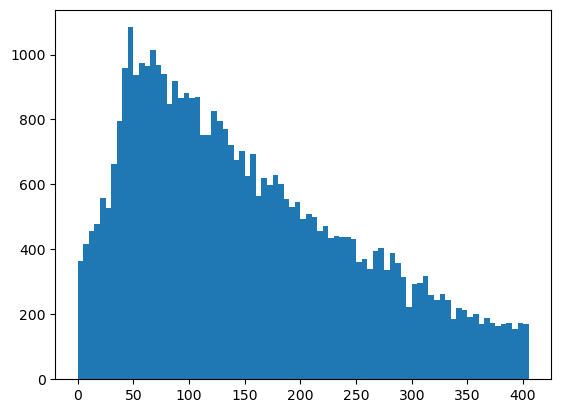

In [44]:
plt.hist(totalNumWords,bins = np.arange(0,410,5))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

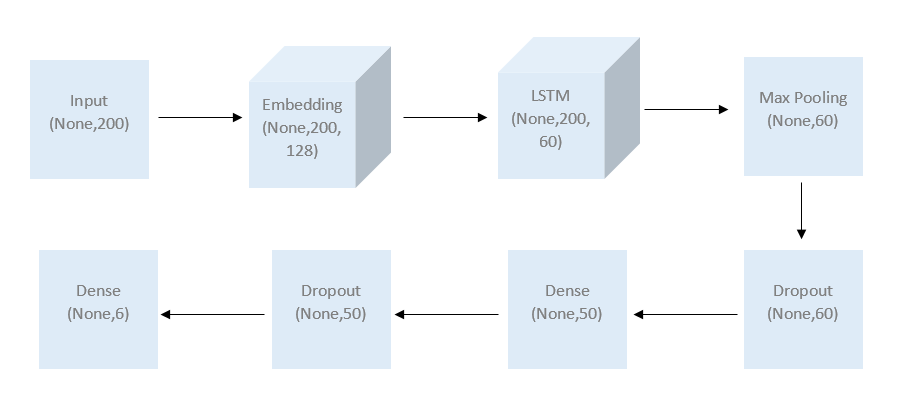

### First model

In [48]:
inp = Input(shape=(maxlen, )) #maxlen=200 comme définit précédemment
embed_size = 128

x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(8, activation="sigmoid")(x)

In [49]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',  # declarer en objet
                  metrics=['accuracy'])

In [56]:
batch_size = 16
epochs = 2
with tf.device('/cpu:0'):
    model.fit(X_t, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
2600/2600 [==============================] - 260s 100ms/step - loss: -3535599.5000 - accuracy: 0.8565 - val_loss: -4108121.2500 - val_accuracy: 0.8078
Epoch 2/2
2600/2600 [==============================] - 254s 98ms/step - loss: -6301815.5000 - accuracy: 0.8565 - val_loss: -6771390.0000 - val_accuracy: 0.8078


### Autre test

In [60]:
X_train

20121    Un thriller vraiment haletant Je suis contente...
2917     Une analyse tres pointilleuse de la haine raci...
42677    avais ete emballe par ma premiere incursion da...
15657    Le cycle est termine Robin Hobb nous emmene tr...
28019    Fantastique est du Emma comme aime est sans do...
                               ...                        
29788    Une grande frustration voici ce qu apporte ce ...
6552     attendais beaucoup de ce livre au soustitre ev...
58921    Blankets est une autobiographie tres attachant...
35890    Michael un jeune garçon partait faire le toute...
11563    Le commissaire Leon Markowicz est responsable ...
Name: commentaire_clean, Length: 46207, dtype: object

https://www.kaggle.com/code/sbongo/for-beginners-tackling-toxic-using-keras

In [64]:
model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu', input_shape=(X_t.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid')) # <-- Notice activation in final layer.

model.compile(loss='binary_crossentropy',               # <-- Notice loss function. 
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(X_t, y_train, epochs = 10)

Epoch 1/10
1444/1444 [==============================] - 9s 6ms/step - loss: -10783250432.0000 - accuracy: 0.8481
Epoch 2/10
1444/1444 [==============================] - 8s 6ms/step - loss: -134078685184.0000 - accuracy: 0.8546
Epoch 3/10
1444/1444 [==============================] - 8s 6ms/step - loss: -474899611648.0000 - accuracy: 0.8546
Epoch 4/10
1444/1444 [==============================] - 8s 6ms/step - loss: -1078027485184.0000 - accuracy: 0.8546
Epoch 5/10
1444/1444 [==============================] - 8s 6ms/step - loss: -1981547544576.0000 - accuracy: 0.8546
Epoch 6/10
1444/1444 [==============================] - 9s 6ms/step - loss: -3224317460480.0000 - accuracy: 0.8546
Epoch 7/10
1444/1444 [==============================] - 9s 6ms/step - loss: -4849297522688.0000 - accuracy: 0.8546
Epoch 8/10
1444/1444 [==============================] - 9s 6ms/step - loss: -6896661561344.0000 - accuracy: 0.8546
Epoch 9/10
1444/1444 [==============================] - 9s 6ms/step - loss: -9407170

### Test Simple

In [66]:
max_words = 1000
max_len = 200

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_encoded = tokenizer.texts_to_sequences(X_train)

sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(X_encoded, maxlen=max_len)

In [72]:
model0 = tf.keras.Sequential([
    keras.layers.Embedding(max_words, 32, input_length=max_len),
    keras.layers.LSTM(64),
    keras.layers.Flatten(),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid')
])

In [73]:
model0.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [74]:
model0.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 32)           32000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 250)               16250     
                                                                 
 dropout_11 (Dropout)        (None, 250)               0         
                                                                 
 dense_16 (Dense)            (None, 120)               30120     
                                                                 
 dense_17 (Dense)            (None, 8)                

In [76]:
from keras.callbacks import EarlyStopping

with tf.device('/cpu:0'):
    history = model0.fit(sequences_padded,
                         y_train,
                         batch_size=128,
                         epochs=10,
                         validation_split=0.2,
                         callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
289/289 [==============================] - 39s 126ms/step - loss: -381773.0312 - accuracy: 0.8517 - val_loss: -1287600.5000 - val_accuracy: 0.8535
Epoch 2/10
289/289 [==============================] - 37s 129ms/step - loss: -3755391.5000 - accuracy: 0.8549 - val_loss: -7416817.0000 - val_accuracy: 0.8535


In [80]:
max_len = 400
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)

In [81]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)

In [82]:
scores = model0.evaluate(test_sequences_padded, y_test, verbose=0)
scores

[-3471567749120.0, 0.8548983931541443]

In [83]:
print("Accuracy : %2f%%" %(scores[1]*100))

Accuracy : 85.489839%


### Test 2 : TextVectorization

In [84]:
max_words = 1000
max_len = 400

text_vectorized = tf.keras.layers.TextVectorization(
    max_tokens=max_words,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=max_len
)

text_vectorized.adapt(X_train)

In [85]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim=max_words,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=max_len
)

In [89]:
input_layer = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
vector_layer = text_vectorized(input_layer)
embedding_layer_model = embedding_layer(vector_layer)

x = tf.keras.layers.GlobalAveragePooling1D()
x = x(embedding_layer_model)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

output_layer = tf.keras.layers.Dense(8, activation='sigmoid')(x)

model_2 = keras.Model(input_layer, output_layer)

In [90]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 400, 128)          128000    
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                4128

In [91]:
model_2.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),
                metrics=['accuracy'])

In [92]:
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=10,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2 * len(X_test)))

Epoch 1/10
1444/1444 [==============================] - 27s 17ms/step - loss: -196611.6094 - accuracy: 0.8534 - val_loss: -747482.5000 - val_accuracy: 0.8549
Epoch 2/10
1444/1444 [==============================] - 13s 9ms/step - loss: -2371295.7500 - accuracy: 0.8546
Epoch 3/10
1444/1444 [==============================] - 13s 9ms/step - loss: -8333824.0000 - accuracy: 0.8546
Epoch 4/10
1444/1444 [==============================] - 13s 9ms/step - loss: -18887420.0000 - accuracy: 0.8546
Epoch 5/10
1444/1444 [==============================] - 13s 9ms/step - loss: -34731072.0000 - accuracy: 0.8546
Epoch 6/10
1444/1444 [==============================] - 13s 9ms/step - loss: -56502184.0000 - accuracy: 0.8546
Epoch 7/10
1444/1444 [==============================] - 13s 9ms/step - loss: -84899064.0000 - accuracy: 0.8546
Epoch 8/10
1444/1444 [==============================] - 13s 9ms/step - loss: -120629336.0000 - accuracy: 0.8546
Epoch 9/10
1444/1444 [==============================] - 13s 9ms/st

### Bi-LSTM (simple BERT)

In [97]:
input_layer = tf.keras.layers.Input(shape=(1,), dtype=tf.string) 

vector_layer = text_vectorized(input_layer) 
embedding_layer_model = embedding_layer(vector_layer) 

bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='tanh', return_sequences=True))(embedding_layer_model) 
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(bi_lstm)

flatten = tf.keras.layers.Flatten()(lstm) 

dropout = tf.keras.layers.Dropout(.2)(flatten) 

x = tf.keras.layers.Dense(32, activation='relu')(dropout) 

output_layer = tf.keras.layers.Dense(8, activation='sigmoid')(x) 

In [98]:
model_3 = tf.keras.Model(input_layer, output_layer) 

In [99]:
model_3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),
                metrics=['accuracy'])

In [102]:
with tf.device('/cpu:0'):    
    history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=1,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2*len(X_test)))

1444/1444 [==============================] - 3362s 2s/step - loss: -139856.9688 - accuracy: 0.8546 - val_loss: -392818.8750 - val_accuracy: 0.8549


In [105]:
with tf.device('/cpu:0'):  
    y_preds = np.round(model_3.predict(X_test))
    accuracy = accuracy_score(y_test, np.argmax(y_preds, axis=1))
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

482/482 [==============================] - 535s 1s/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

Il y a une erreur liée entre **classification multilabels** et **target binaire**

In [108]:
y_preds.shape, y_test.shape

((15403, 8), (15403, 8))

In [ ]:
print('accuracy  : ',accuracy)
print('precision : ',precision)
print('recall    : ',recall)
print('f1-score  : ',f1)

### Fine Tuning Class CamemBERT

#### Class pour faire les MASKS

In [ ]:
train_dataloader = DataLoader(
    X_train, 
    batch_size=16, 
    shuffle=True, 
    collate_fn=functools.partial(tokenize_batch, tokenizer=tokenizer)
)
val_dataloader = DataLoader(
    X_test, 
    batch_size=16, 
    shuffle=False, 
    collate_fn=functools.partial(tokenize_batch, tokenizer=tokenizer)
)

In [ ]:
class LightningModel(pl.LightningModule):
    def __init__(self, model_name, num_labels, lr, weight_decay, from_scratch=False):
        super().__init__()
        self.save_hyperparameters()
        if from_scratch:
            # Si `from_scratch` est vrai, on charge uniquement la config (nombre de couches, hidden size, etc.) et pas les poids du modèle 
            config = AutoConfig.from_pretrained(
                model_name, num_labels=num_labels
            )
            self.model = AutoModelForSequenceClassification.from_config(config)
        else:
            # Cette méthode permet de télécharger le bon modèle pré-entraîné directement depuis le Hub de HuggingFace sur lequel sont stockés de nombreux modèles
            self.model = AutoModelForSequenceClassification.from_pretrained(
                model_name, num_labels=num_labels
            )
        self.lr = lr
        self.weight_decay = weight_decay
        self.num_labels = self.model.num_labels

    def forward(self, batch):
        return self.model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"]
        )

    def training_step(self, batch):
        out = self.forward(batch)

        logits = out.logits
        # -------- MASKED --------
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(logits.view(-1, self.num_labels), batch["labels"].view(-1))

        # ------ END MASKED ------

        self.log("train/loss", loss)

        return loss

    def validation_step(self, batch, batch_index):
        labels = batch["labels"]
        out = self.forward(batch)

        preds = torch.max(out.logits, -1).indices
        # -------- MASKED --------
        acc = (batch["labels"] == preds).float().mean()
        # ------ END MASKED ------
        self.log("valid/acc", acc)

        f1 = f1_score(batch["labels"].cpu().tolist(), preds.cpu().tolist(), average="macro")
        self.log("valid/f1", f1)

    def predict_step(self, batch, batch_idx):
        """La fonction predict step facilite la prédiction de données. Elle est 
        similaire à `validation_step`, sans le calcul des métriques.
        """
        out = self.forward(batch)

        return torch.max(out.logits, -1).indices

    def configure_optimizers(self):
        return torch.optim.AdamW(
            self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay
        )

In [ ]:
# lightning_model = LightningModel("camembert-base", num_labels, lr=3e-5, weight_decay=0.)
# lightning_model = LightningModel("RomanCast/camembert-miam-loria-finetuned", num_labels, lr=3e-5, weight_decay=0.)

In [ ]:
model_checkpoint = pl.callbacks.ModelCheckpoint(monitor="valid/acc", mode="max")

camembert_trainer = pl.Trainer(
    max_epochs=20,
    gpus=1,
    callbacks=[
        pl.callbacks.EarlyStopping(monitor="valid/acc", patience=4, mode="max"),
        model_checkpoint,
    ]
)

In [ ]:
ID_TO_LABEL = y

In [ ]:
def get_preds(model, tokenizer, sentence):
    tokenized_sentence = tokenizer(sentence, return_tensors="pt")
    input_ids, attention_mask = tokenized_sentence.input_ids, tokenized_sentence.attention_mask

    out = model(
        input_ids=tokenized_sentence.input_ids,
        attention_mask=tokenized_sentence.attention_mask
    )

    logits = out.logits

    probas = torch.softmax(logits, -1).squeeze()

    pred = torch.argmax(probas)

    return ID_TO_LABEL[pred], probas[pred].item()

### Test avec uniquement 0 ou 1 pour les sentiments

In [109]:
julien1_df.columns

Index(['book_id', 'book_nb_comm', 'title', 'name', 'surname', 'img_url',
       'comm_id', 'user_id', 'note', 'date', 'appreciations', 'commentaire',
       'gender', 'book_url', 'tags', 'book_rating_count', 'book_rating_value',
       'book_author_url', 'book_editor', 'book_pages', 'sen_colère',
       'sen_confiance', 'sen_honte', 'sen_joie', 'sen_peur', 'sen_réflexion',
       'sen_surprise', 'sen_tristesse'],
      dtype='object')

In [125]:
df_test_binaire = julien1_df.iloc[:61610, -8:]
df_test_binaire

,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
1,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
2,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
3,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
4,0.292288,0.187840,0.0,0.334643,0.098929,0.137829,0.092294,0.142990
...,...,...,...,...,...,...,...,...
61605,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61606,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61607,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916
61608,0.078178,0.182298,0.0,0.290264,0.119810,0.147222,0.109318,0.110916


In [126]:
for col in df_test_binaire.columns:
    df_test_binaire[col] = df_test_binaire[col].apply(lambda x: 1 if x!=0 else 0)

In [127]:
df_test_binaire

,sen_colère,sen_confiance,sen_honte,sen_joie,sen_peur,sen_réflexion,sen_surprise,sen_tristesse
0,1,1,0,1,1,1,1,1
1,1,1,0,1,1,1,1,1
2,1,1,0,1,1,1,1,1
3,1,1,0,1,1,1,1,1
4,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
61605,1,1,0,1,1,1,1,1
61606,1,1,0,1,1,1,1,1
61607,1,1,0,1,1,1,1,1
61608,1,1,0,1,1,1,1,1


In [128]:
df_test_binaire['sen_colère'].value_counts()

1    56123
0     5487
Name: sen_colère, dtype: int64

In [129]:
julien1_df.iloc[:61610, :-8].columns

Index(['book_id', 'book_nb_comm', 'title', 'name', 'surname', 'img_url',
       'comm_id', 'user_id', 'note', 'date', 'appreciations', 'commentaire',
       'gender', 'book_url', 'tags', 'book_rating_count', 'book_rating_value',
       'book_author_url', 'book_editor', 'book_pages'],
      dtype='object')

In [131]:
df_test_binaire = pd.concat([julien1_df.iloc[:61610, :-8], df_test_binaire],axis=1)

In [12]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [13]:
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3') # bert_multi_cased_preprocess
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4') # bert_multi_cased_L12_H768_A12

#### test sigmoid

In [133]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(8, activation = 'sigmoid', name = 'Dense')(dropout)

In [134]:
camembert= tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [135]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [136]:
camembert.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [139]:
y = df_test_binaire[df_test_binaire.columns[-8:]]

X_train, X_test , y_train, y_test = train_test_split(df_test_binaire['commentaire'], y,
                                                    stratify = y)

In [141]:
history = camembert.fit(X_train, y_train, epochs = 2)

Epoch 1/2
1444/1444 [==============================] - 480s 325ms/step - loss: 0.1962 - accuracy: 0.9069 - precision: 0.9316 - recall: 0.9683
Epoch 2/2
1444/1444 [==============================] - 486s 336ms/step - loss: 0.1869 - accuracy: 0.9097 - precision: 0.9324 - recall: 0.9707


#### test linear

In [42]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from sklearn.model_selection import train_test_split

In [109]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
dense = tf.keras.layers.Dense(8, activation = 'relu', name = 'Dense1')(dropout)
outputs = tf.keras.layers.Dense(1, activation = 'linear', name = 'Dense2')(dense)

In [110]:
bert_multi = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [111]:
Metrics = [tf.keras.metrics.MeanSquaredError(name='mean_absolute_error'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [112]:
bert_multi.compile(optimizer ='adam',
               loss = tf.keras.losses.MeanSquaredError(),
               metrics = Metrics)

In [59]:
# df_sent_test = julien1_df.iloc[:61610, :]

In [96]:
julien1_df = create_target(julien1_df, columns=julien1_df.columns)

In [115]:
julien1_df.fillna(value='', inplace=True)

In [116]:
y = julien1_df['target']

X_train, X_test , y_train, y_test = train_test_split(julien1_df['commentaire'], y)

In [117]:
def show_shapes():
    print("Expected: (num_samples, timesteps, channels)")
    print("Sequences: {}".format(Sequences.shape))
    print("Targets:   {}".format(Targets.shape))   

Sequences = np.asarray(X_train)
Targets   = np.asarray(y_train)
show_shapes()

Expected: (num_samples, timesteps, channels)
Sequences: (235506,)
Targets:   (235506,)


In [ ]:
# probleme avec la liste ==> ne peux pas être converti en Tensor...

In [ ]:
# history = bert_multi.fit(X_train, y_train, epochs = 2)

In [ ]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

La distance de Jaccard représente représente le nombre de cas de présence simultanée dans deux commentaires étudiés, divisé par le nombre de cas où est présent le mot dans au moins un des deux commentaires.

In [ ]:
def jaccard_binary(x,y):
    """Trouve la similarité entre deux vecteurs binaires"""
    intersection = np.logical_and(x, y)                  # x et y en même temps
    union = np.logical_or(x, y)                          # x ou y
    similarity = intersection.sum() / float(union.sum()) # la somme des intersections / la somme des unions
    return similarity                                    